## Training Models
- Variations
    - To train without augmentations, pass test=True (data isn't augmented at test time)
    - To train without Fourier downsampling, pass fourier=False
        - With IIR downsampling, the d_in becomes 1 instead of 3, seq_len becomes 400 instead of 40.
        - Will also have to decrease batch size and model size due to needing to load more data onto CUDA
- Pretraining
    - To pretrain an encoder using predictive pretraining, use the TransformerModel_mask object, pass mask=True into the Dataset, and call pretrain_model() from mask_pretrain.py
    - To pretrain an encoder using contrastic pretraining, use the TransformerModel_triplet object, and call pretrain_model() from triplet_pretrain.py
    - Hyperparameters, Data augmentations and Fourier downsampling can be experimented with

Can also modify runner.py with these variations

### End-to-end Training

In [1]:
import torch
from train import train_model
from datasets import AugmentedDataset
from torch.utils.data import DataLoader
from utils import collate_fn_transpose
from models import TransformerModel_cls

params = {
        "batch_size": 1024,
        "epochs": 11000,
        "d_in": 3,
        "d_model": 140,
        "nhead": 20,
        "d_hid": 300,
        "nlayers": 6,
        "dropout": 0.3,
        "warmup": 4000,
        "seq_len": 40,
        "d_lin": 512,
        "d_out": 64,
        "n_classes": 10,
        "model": "Transformer_cls",
        "fourier": True,
        "p_no_aug": .1,
        "p_two_aug": .5,
    }

model = TransformerModel_cls(  d_in = params["d_in"], 
                            d_model = params["d_model"], 
                            nhead = params["nhead"], 
                            d_hid = params["d_hid"],
                            nlayers = params["nlayers"], 
                            seq_len = params["seq_len"], 
                            dropout = params["dropout"])

fold = 1
train_dir = "CWRU/kfold/training_data_" + str(fold)
test_dir = "CWRU/kfold/test_data_" + str(fold)
train_dir_l = "CWRU/kfold/training_labels_" + str(fold)
test_dir_l = "CWRU/kfold/test_labels_" + str(fold)

batch_size = params["batch_size"]
p_no_aug = params["p_no_aug"]
p_two_aug = params["p_two_aug"]

training_data = AugmentedDataset(data_path=train_dir, label_path=train_dir_l, p_no_aug=p_no_aug, p_two_aug=p_two_aug, fourier=True, test=False)
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, collate_fn = collate_fn_transpose)

test_data = AugmentedDataset(data_path=test_dir, label_path=test_dir_l, fourier=True, test=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, collate_fn = collate_fn_transpose)

train_model(model, params, train_dataloader=train_dataloader, test_dataloader=test_dataloader)

/home/cmu/anaconda3/envs/fault/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Validation Epoch [1/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]


-----------------------------------------------------------------------------------------
training loss 0.0034 | valid loss 0.0045
training accuracy 0.1031 | validation accuracy 0.1018
-----------------------------------------------------------------------------------------


Validation Epoch [2/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0045
training accuracy 0.1076 | validation accuracy 0.1018
-----------------------------------------------------------------------------------------


Validation Epoch [3/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0045
training accuracy 0.1009 | validation accuracy 0.1036
-----------------------------------------------------------------------------------------


Validation Epoch [4/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0044
training accuracy 0.1013 | validation accuracy 0.1071
-----------------------------------------------------------------------------------------


Validation Epoch [5/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0044
training accuracy 0.0978 | validation accuracy 0.1071
-----------------------------------------------------------------------------------------


Validation Epoch [6/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0044
training accuracy 0.0996 | validation accuracy 0.1036
-----------------------------------------------------------------------------------------


Validation Epoch [7/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0044
training accuracy 0.1031 | validation accuracy 0.1054
-----------------------------------------------------------------------------------------


Validation Epoch [8/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0044
training accuracy 0.1058 | validation accuracy 0.0982
-----------------------------------------------------------------------------------------


Validation Epoch [9/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0043
training accuracy 0.1022 | validation accuracy 0.0982
-----------------------------------------------------------------------------------------


Validation Epoch [10/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0043
training accuracy 0.1156 | validation accuracy 0.0929
-----------------------------------------------------------------------------------------


Validation Epoch [11/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]


-----------------------------------------------------------------------------------------
training loss 0.0033 | valid loss 0.0043
training accuracy 0.0987 | validation accuracy 0.0982
-----------------------------------------------------------------------------------------


Validation Epoch [12/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0043
training accuracy 0.1067 | validation accuracy 0.0821
-----------------------------------------------------------------------------------------


Validation Epoch [13/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0042
training accuracy 0.1071 | validation accuracy 0.0893
-----------------------------------------------------------------------------------------


Validation Epoch [14/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0042
training accuracy 0.1112 | validation accuracy 0.0893
-----------------------------------------------------------------------------------------


Validation Epoch [15/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0042
training accuracy 0.1049 | validation accuracy 0.0857
-----------------------------------------------------------------------------------------


Validation Epoch [16/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0042
training accuracy 0.1076 | validation accuracy 0.0893
-----------------------------------------------------------------------------------------


Validation Epoch [17/11000]: 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0042
training accuracy 0.1103 | validation accuracy 0.0893
-----------------------------------------------------------------------------------------


Validation Epoch [18/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0042
training accuracy 0.1143 | validation accuracy 0.0929
-----------------------------------------------------------------------------------------


Validation Epoch [19/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0042
training accuracy 0.1022 | validation accuracy 0.1054
-----------------------------------------------------------------------------------------


Validation Epoch [20/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0041
training accuracy 0.1071 | validation accuracy 0.1143
-----------------------------------------------------------------------------------------


Validation Epoch [21/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0041
training accuracy 0.1094 | validation accuracy 0.1196
-----------------------------------------------------------------------------------------


Validation Epoch [22/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0041
training accuracy 0.1027 | validation accuracy 0.1232
-----------------------------------------------------------------------------------------


Validation Epoch [23/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0041
training accuracy 0.1125 | validation accuracy 0.1321
-----------------------------------------------------------------------------------------


Validation Epoch [24/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1089 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [25/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0041
training accuracy 0.1103 | validation accuracy 0.1375
-----------------------------------------------------------------------------------------


Validation Epoch [26/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]


-----------------------------------------------------------------------------------------
training loss 0.0032 | valid loss 0.0041
training accuracy 0.1103 | validation accuracy 0.1411
-----------------------------------------------------------------------------------------


Validation Epoch [27/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1219 | validation accuracy 0.1339
-----------------------------------------------------------------------------------------


Validation Epoch [28/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1165 | validation accuracy 0.1375
-----------------------------------------------------------------------------------------


Validation Epoch [29/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1045 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [30/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1237 | validation accuracy 0.1429
-----------------------------------------------------------------------------------------


Validation Epoch [31/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1147 | validation accuracy 0.1375
-----------------------------------------------------------------------------------------


Validation Epoch [32/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1143 | validation accuracy 0.1411
-----------------------------------------------------------------------------------------


Validation Epoch [33/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1219 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [34/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1094 | validation accuracy 0.1339
-----------------------------------------------------------------------------------------


Validation Epoch [35/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1201 | validation accuracy 0.1304
-----------------------------------------------------------------------------------------


Validation Epoch [36/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1228 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [37/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1312 | validation accuracy 0.1286
-----------------------------------------------------------------------------------------


Validation Epoch [38/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1174 | validation accuracy 0.1250
-----------------------------------------------------------------------------------------


Validation Epoch [39/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0041
training accuracy 0.1335 | validation accuracy 0.1304
-----------------------------------------------------------------------------------------


Validation Epoch [40/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1187 | validation accuracy 0.1250
-----------------------------------------------------------------------------------------


Validation Epoch [41/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1210 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [42/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1281 | validation accuracy 0.1393
-----------------------------------------------------------------------------------------


Validation Epoch [43/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1384 | validation accuracy 0.1411
-----------------------------------------------------------------------------------------


Validation Epoch [44/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1201 | validation accuracy 0.1375
-----------------------------------------------------------------------------------------


Validation Epoch [45/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1246 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [46/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1527 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [47/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1491 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [48/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]


-----------------------------------------------------------------------------------------
training loss 0.0030 | valid loss 0.0040
training accuracy 0.1326 | validation accuracy 0.1339
-----------------------------------------------------------------------------------------


Validation Epoch [49/11000]: 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]


-----------------------------------------------------------------------------------------
training loss 0.0031 | valid loss 0.0040
training accuracy 0.1460 | validation accuracy 0.1357
-----------------------------------------------------------------------------------------


Validation Epoch [50/11000]: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


-----------------------------------------------------------------------------------------
training loss 0.0030 | valid loss 0.0040
training accuracy 0.1638 | validation accuracy 0.1393
-----------------------------------------------------------------------------------------


Validation Epoch [51/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]


-----------------------------------------------------------------------------------------
training loss 0.0030 | valid loss 0.0040
training accuracy 0.1562 | validation accuracy 0.1482
-----------------------------------------------------------------------------------------


Validation Epoch [52/11000]: 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]


-----------------------------------------------------------------------------------------
training loss 0.0030 | valid loss 0.0040
training accuracy 0.1634 | validation accuracy 0.1518
-----------------------------------------------------------------------------------------


Training Epoch [53/11000]:   0%|          | 0/3 [00:00<?, ?it/s]


KeyboardInterrupt: 

### Masked Pretraining

In [1]:
import torch
from mask_pretrain import pretrain_model
from datasets import AugmentedDataset
from torch.utils.data import DataLoader
from utils import collate_fn_transpose
from models import TransformerModel_mask

params = {"batch_size": 64, 
        "epochs": 500, 
        "d_in": 1, 
        "d_model": 64, 
        "nhead": 16, 
        "d_hid": 128, 
        "nlayers": 4, 
        "dropout": 0.3, 
        "warmup": 4000, 
        "seq_len": 400, 
        "model": "Transformer_mask", }

model = TransformerModel_mask(d_in = params["d_in"], 
                            d_model = params["d_model"], 
                            nhead = params["nhead"], 
                            d_hid = params["d_hid"],
                            nlayers = params["nlayers"], 
                            seq_len = params["seq_len"], 
                            dropout = params["dropout"])

fold = 1
train_dir = "data/5folddata/training_data_" + str(fold)
test_dir = "data/5folddata/test_data_" + str(fold)

batch_size = params["batch_size"]

training_data = AugmentedDataset(data_path=train_dir, fourier=False, test=True, mask=True)
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, collate_fn = collate_fn_transpose)

test_data = AugmentedDataset(data_path=test_dir, fourier=False, test=True, mask=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, collate_fn = collate_fn_transpose)

pretrain_model(model, params, dataloader=train_dataloader)

/home/cmu/anaconda3/envs/fault/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training Epoch [1/500]: 100%|██████████| 35/35 [00:11<00:00,  3.05it/s]


-----------------------------------------------------------------------------------------
training loss 1.8499
-----------------------------------------------------------------------------------------


Training Epoch [2/500]:  26%|██▌       | 9/35 [00:03<00:08,  2.92it/s]


KeyboardInterrupt: 

### Triplet Pretraining

In [3]:
import torch
from triplet_pretrain import pretrain_model
from datasets import AugmentedDataset
from torch.utils.data import DataLoader
from utils import collate_fn_transpose
from models import TransformerModel_triplet

params = {"batch_size": 64, 
        "epochs": 500, 
        "d_in": 3, 
        "d_model": 64, 
        "nhead": 16, 
        "d_hid": 128, 
        "nlayers": 4, 
        "dropout": 0.3, 
        "warmup": 4000, 
        "seq_len": 40, 
        "margin": 0.05,
        "d_lin": 1024,
        "d_out": 64}

model = TransformerModel_triplet(d_in = params["d_in"], 
                            d_model = params["d_model"], 
                            nhead = params["nhead"], 
                            d_hid = params["d_hid"],
                            nlayers = params["nlayers"], 
                            d_lin = params["d_lin"],
                            d_out = params["d_out"],
                            seq_len = params["seq_len"], 
                            dropout = params["dropout"])

fold = 1
train_dir = "data/5folddata/training_data_" + str(fold)
train_dir_l = "data/5folddata/training_labels_" + str(fold)

batch_size = params["batch_size"]

training_data = AugmentedDataset(data_path=train_dir, label_path=train_dir_l, fourier=True, test=False)
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, collate_fn = collate_fn_transpose)

pretrain_model(model, params, dataloader=train_dataloader)

Training Epoch [1/500]: 100%|██████████| 35/35 [00:00<00:00, 48.42it/s]


-----------------------------------------------------------------------------------------
training loss 323.8758
-----------------------------------------------------------------------------------------


Training Epoch [2/500]: 100%|██████████| 35/35 [00:00<00:00, 64.26it/s]


-----------------------------------------------------------------------------------------
training loss 304.1867
-----------------------------------------------------------------------------------------


Training Epoch [3/500]: 100%|██████████| 35/35 [00:00<00:00, 64.62it/s]


-----------------------------------------------------------------------------------------
training loss 284.1928
-----------------------------------------------------------------------------------------


Training Epoch [4/500]: 100%|██████████| 35/35 [00:00<00:00, 64.65it/s]


-----------------------------------------------------------------------------------------
training loss 240.6230
-----------------------------------------------------------------------------------------


Training Epoch [5/500]: 100%|██████████| 35/35 [00:00<00:00, 64.10it/s]


-----------------------------------------------------------------------------------------
training loss 182.6832
-----------------------------------------------------------------------------------------


Training Epoch [6/500]: 100%|██████████| 35/35 [00:00<00:00, 64.62it/s]


-----------------------------------------------------------------------------------------
training loss 124.7556
-----------------------------------------------------------------------------------------


Training Epoch [7/500]: 100%|██████████| 35/35 [00:00<00:00, 62.96it/s]


-----------------------------------------------------------------------------------------
training loss 91.3331
-----------------------------------------------------------------------------------------


Training Epoch [8/500]: 100%|██████████| 35/35 [00:00<00:00, 64.05it/s]


-----------------------------------------------------------------------------------------
training loss 71.2899
-----------------------------------------------------------------------------------------


Training Epoch [9/500]: 100%|██████████| 35/35 [00:00<00:00, 64.24it/s]


-----------------------------------------------------------------------------------------
training loss 60.4561
-----------------------------------------------------------------------------------------


Training Epoch [10/500]:  20%|██        | 7/35 [00:00<00:00, 59.44it/s]


KeyboardInterrupt: 

## Loading Pretrained Model
If loading a pretrained model for fine-tuning, (i.e. not just inference), also need to load the optimizer state dict and pass to training function.

In [1]:
import torch
from datasets import AugmentedDataset
from torch.utils.data import DataLoader
from utils import collate_fn_transpose
from models import TransformerModel_cls
import seaborn as sns

params = {
        "batch_size": 1024,
        "epochs": 11000,
        "d_in": 3,
        "d_model": 140,
        "nhead": 20,
        "d_hid": 300,
        "nlayers": 6,
        "dropout": 0.3,
        "warmup": 4000,
        "seq_len": 40,
        "d_lin": 512,
        "d_out": 64,
        "n_classes": 10,
        "model": "Transformer_cls",
        "fourier": True,
        "p_no_aug": .1,
        "p_two_aug": .5,
    }

model = TransformerModel_cls(d_in = params["d_in"], 
                            d_model = params["d_model"], 
                            nhead = params["nhead"], 
                            d_hid = params["d_hid"],
                            nlayers = params["nlayers"], 
                            seq_len = params["seq_len"], 
                            dropout = params["dropout"])

fold = 1
test_dir = "data/5folddata/test_data_" + str(fold)
test_dir_l = "data/5folddata/test_labels_" + str(fold)

p_no_aug = params["p_no_aug"]
p_two_aug = params["p_two_aug"]
batch_size = params["batch_size"]

test_data = AugmentedDataset(data_path=test_dir, label_path=test_dir_l, fourier=True, test=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, collate_fn = collate_fn_transpose)

x, y = next(iter(test_dataloader))
path = "models/model_trained"
checkpoint = torch.load(path)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

/home/cmu/anaconda3/envs/fault/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TransformerModel_cls(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.3, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=140, out_features=140, bias=True)
        )
        (linear1): Linear(in_features=140, out_features=300, bias=True)
        (dropout): Dropout(p=0.3, inplace=False)
        (linear2): Linear(in_features=300, out_features=140, bias=True)
        (norm1): LayerNorm((140,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((140,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.3, inplace=False)
        (dropout2): Dropout(p=0.3, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=140, out_features=140, bias=True)
        )
    

## Visualizing Attention

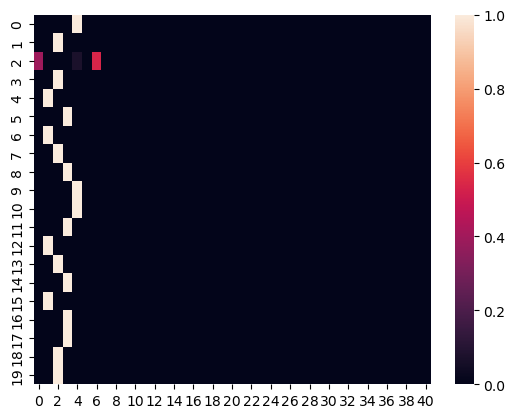

In [3]:
from utils import encoder_forward, visualize_attn

x_1 = x[:, 0, :].unsqueeze(1)
src = encoder_forward(model, x_1)

w0 = model.state_dict()["transformer_encoder.layers.0.self_attn.in_proj_weight"]
b0 = model.state_dict()["transformer_encoder.layers.0.self_attn.in_proj_bias"]

cls_attn = torch.zeros((20,41))
for i in range(20):
    attn_scores = visualize_attn(w0, b0, src, i)
    cls_attn[i, :] = attn_scores[0, :]
layer0_cls_attn = sns.heatmap(cls_attn)

## t-SNE Embedding and Confusion Matrix

In [5]:
from tsnecuda import TSNE
from sklearn.metrics import confusion_matrix

x = x.cuda()
model.cuda()
y_hat = model(x)

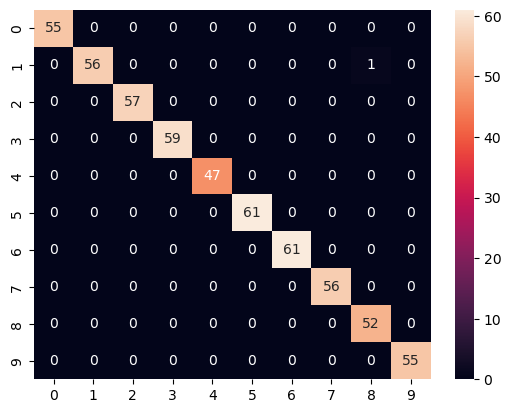

In [9]:
m = confusion_matrix(y, torch.argmax(y_hat.detach().cpu(), dim=1))
cf_matrix = sns.heatmap(m, annot=True)

In [16]:
X_embedded = TSNE(n_components=2, perplexity=15, learning_rate=10).fit_transform(y_hat.detach().cpu())

WARNING clustering 560 points to 23 centroids: please provide at least 897 training points


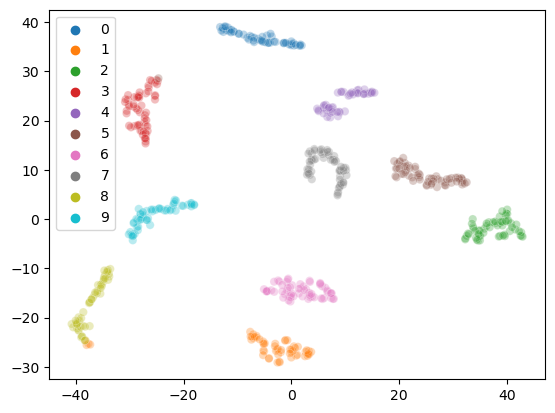

In [17]:
embed = sns.scatterplot(
    x=X_embedded[:,0], y=X_embedded[:,1],
    hue=y,
    palette=sns.color_palette(),
    legend="full",
    alpha=0.3
)

## SNR Accuracy Calculation
Need to load data that isn't downsampled, since need to downsample on the fly after applying random noise. Results will vary since random noise is applied. 

In [8]:
from utils import noisify, fourier_iterate

test_data = AugmentedDataset(data_path=test_dir, label_path=test_dir_l, fourier=False, test=True, k=1)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, collate_fn = collate_fn_transpose)

x, y = next(iter(test_dataloader))
x = x.squeeze()
x = torch.transpose(x, 0, 1)

SNRs = [-4, -2, 0, 2, 4, 6, 8, 10]
accs = []
model.cuda()

for SNR in SNRs:
    num_correct = 0
    x_noise = noisify(x, SNR)
    x_fourier = fourier_iterate(x_noise)
    x_fourier = torch.transpose(x_fourier, 0, 1).cuda()
    output = model(x_fourier).cpu()
    y_hat= torch.argmax(output, dim = 1)
    num_correct += (y_hat == y).sum()
    acc = num_correct/560
    accs.append(acc)

In [9]:
print(accs)

[tensor(0.7750), tensor(0.8018), tensor(0.8304), tensor(0.8982), tensor(0.9661), tensor(0.9964), tensor(0.9964), tensor(0.9964)]
